In [ ]:
## evaluation training run outputs ##

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import sys
import os

In [2]:
sys.path.insert(0, "/home/kylabazlen/")
plotting = importlib.import_module("2026_nvhackathon.validation.plotting")
configure_style = plotting.configure_style
filter_df_by_location = plotting.filter_df_by_location
filter_df_by_time = plotting.filter_df_by_time
COLORS = plotting.COLORS
MARKERS = plotting.MARKERS
plot_timeseries = plotting.plot_timeseries
plot_station_gof_map = plotting.plot_station_gof_map
density_scatter = plotting.density_scatter

evaluation = importlib.import_module("2026_nvhackathon.cowy_point_correction.cowy.evaluation.metrics")
evaluate_bins = evaluation.evaluate_bins
format_results_table = evaluation.format_results_table

In [3]:
#read in predictions and observations and orgiional forecast for the testing split
base_path_run = "/project/cowy-nvhackathon/cowy-wildfire/data/prepare_data_out_small/lightning_logs_v1/ifs_point_correction_v1/version_0/best_ckpt_results"

ml_predictions = np.load(os.path.join(base_path_run, "pred_test.npy"))
observations = np.load(os.path.join(base_path_run, "obs_test.npy"))
test_obs_lookup = pd.read_csv(os.path.join(base_path_run, "test_obs_lookup.csv"))

#where are the origional IFS forecast!?

# ifs_forecast = np.load(os.path.join(base_path, "x_test_bl.npy"))
# ifs_forecast_ws = ifs_forecast[:, 29:30]test_obs_lookup

In [4]:
test_obs_lookup = pd.read_csv(os.path.join(base_path_run, "test_obs_lookup.csv"))

In [18]:
test_obs_lookup['prediction'] = ml_predictions.flatten()
test_obs_lookup['observation'] = observations.flatten()
test_obs_lookup['error_model'] = test_obs_lookup['prediction'] - test_obs_lookup['observation']

# test_obs_df['ifs_forecast'] = ifs_forecast_ws.flatten()
# test_obs_lookup['error_ifs'] = test_obs_lookup['prediction'] - test_obs_lookup['observation']


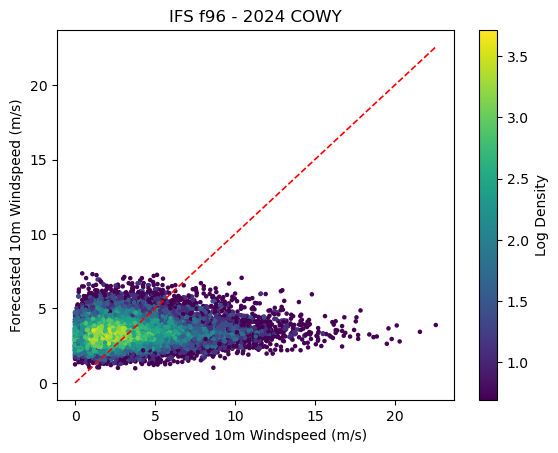

In [13]:
# Scatter plot for ML predictions
x = test_obs_lookup["observation"].values
y = test_obs_lookup["prediction"].values

ax = density_scatter(x=x, y=y)
ax.set_xlabel("Observed 10m Windspeed (m/s)")
ax.set_ylabel("Forecasted 10m Windspeed (m/s)")
ax.set_title("IFS f96 - 2024 COWY")

# # Scatter plot for ML predictions
# x_bl = test_obs_lookup["observation"].values
# y_bl = test_obs_lookup["ifs_forecast"].values

# ax = density_scatter(x=x_bl, y=y_bl)
# ax.set_xlabel("Observed 10m Windspeed (m/s)")
# ax.set_ylabel("Bias-Corrected 10m Windspeed Forecast (m/s)")
# ax.set_title("IFS f72-96 Bias Corrected - 2024 COWY")
# plt.show()

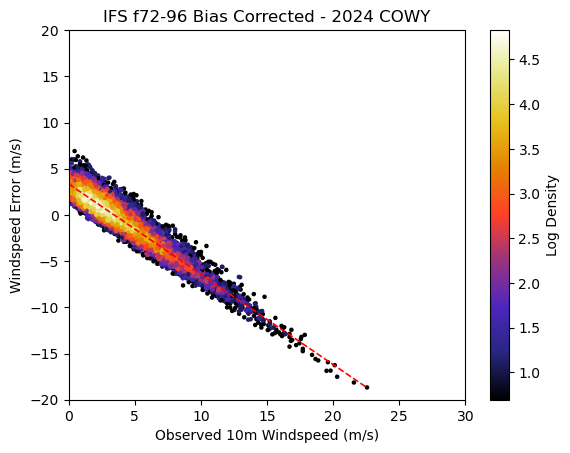

In [20]:
y = test_obs_lookup['error_model'].values
x = test_obs_lookup["observation"].values


ax = density_scatter(x=x, y=y, cmap="CMRmap", one_to_one_line = False, trend_line=True)
ax.set_xlabel("Observed 10m Windspeed (m/s)")
ax.set_ylabel("Windspeed Error (m/s)")
ax.set_title("IFS f72-96 Bias Corrected - 2024 COWY")

ax.set_xlim(0, 30)  # X-axis from 0 to 30 m/s
ax.set_ylim(-20, 20)  # Y-axis (error) from -10 to +10 m/s
plt.show()

# y_bl = test_obs_lookup['error_ifs'].values
# x_bl = test_obs_lookup["observation"].values


# ax = density_scatter(x=x_bl, y=y_bl, cmap="CMRmap", one_to_one_line = False, trend_line=True)
# ax.set_xlabel("Observed 10m Windspeed (m/s)")
# ax.set_ylabel("Windspeed Error (m/s)")
# ax.set_title("IFS f72-96 - 2024 COWY")

# ax.set_xlim(0, 30)  # X-axis from 0 to 30 m/s
# ax.set_ylim(-20, 20)  # Y-axis (error) from -10 to +10 m/s
# plt.show()

## plot time series

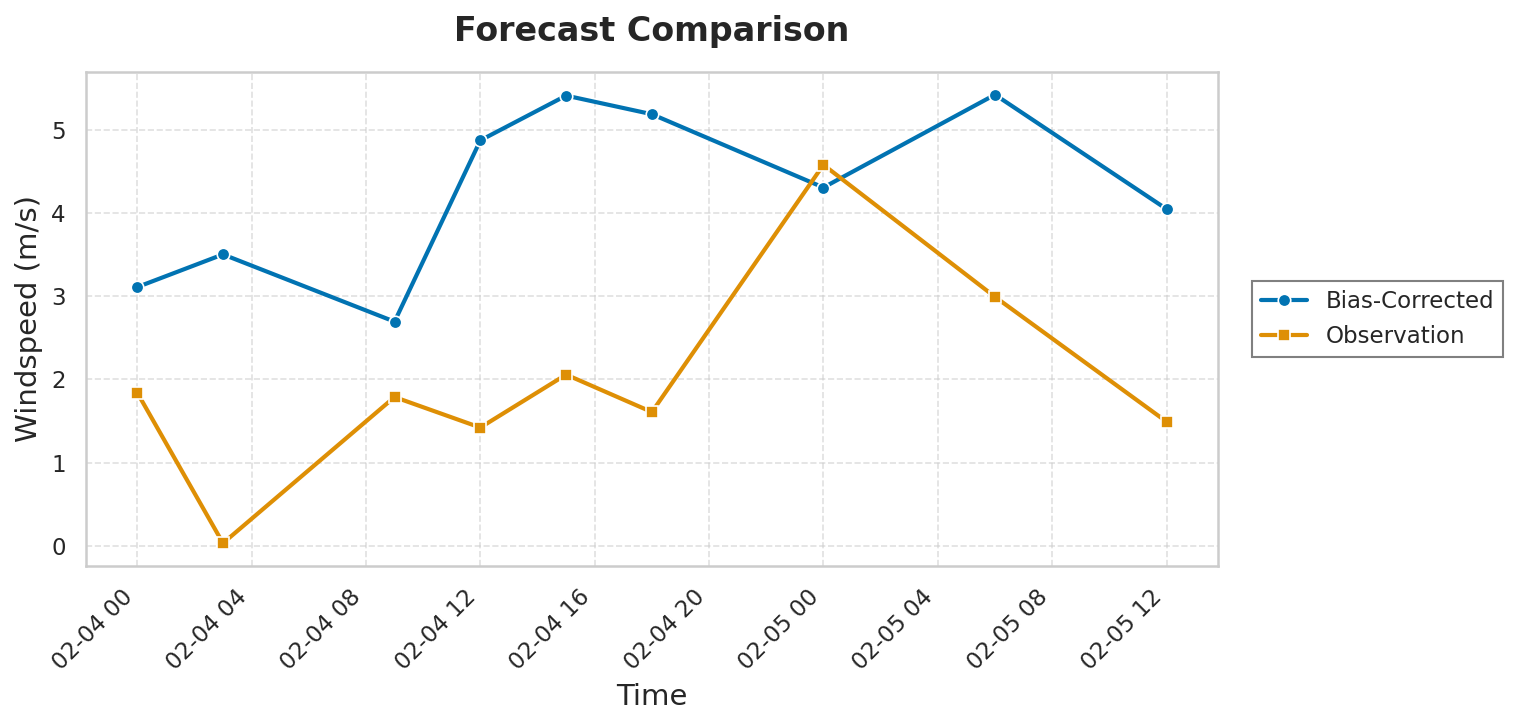

In [24]:
configure_style()

fig, ax = plot_timeseries(
    test_obs_lookup,
    lines=[
        {"col": "prediction", "label": "Bias-Corrected"},
        {"col": "observation", "label": "Observation"},
        # {"col": "ifs_forecast", "label": "Raw IFS"},
    ],
    latitude=41.88616,
    longitude=-106.16315,
    start="2024-02-01",
    end="2024-06-15",
    ylabel="Windspeed (m/s)",
    title="Forecast Comparison",
)